<a href="https://colab.research.google.com/github/yanzhang422/Quant/blob/master/Stock%20Price%20Prediction%20using%20Deep%20Learning%20with%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [231]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as pdd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [232]:
df = pdd.DataReader ('BABA', data_source='yahoo', start='2012-01-01', end='now')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-19,99.699997,89.949997,92.699997,93.889999,271879400,93.889999
2014-09-22,92.949997,89.500000,92.699997,89.889999,66657800,89.889999
2014-09-23,90.480003,86.620003,88.940002,87.169998,39009800,87.169998
2014-09-24,90.570000,87.220001,88.470001,90.570000,32088000,90.570000
2014-09-25,91.500000,88.500000,91.089996,88.919998,28598000,88.919998
...,...,...,...,...,...,...
2021-02-24,252.000000,248.100006,252.000000,250.339996,12831700,250.339996
2021-02-25,250.339996,240.070007,250.000000,240.179993,17967300,240.179993
2021-02-26,244.899994,237.649994,244.630005,237.759995,17460500,237.759995


<function matplotlib.pyplot.show>

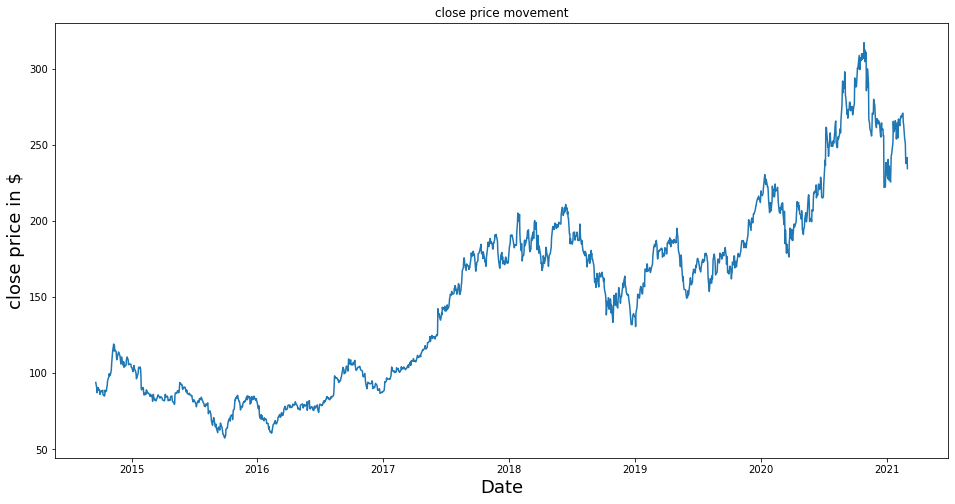

In [233]:
plt.figure(figsize=(16,8))
plt.title('close price movement')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.show

In [234]:
data = df.filter(['Close'])
dataset = data.values
len(dataset)

1623

In [235]:
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

1137

In [236]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.14051972],
       [0.1251203 ],
       [0.11464869],
       ...,
       [0.6943984 ],
       [0.70952836],
       [0.6815399 ]])

In [237]:
train_data = scaled_data[0:training_data_size, :]
prediction_days = 60
x_train = []
y_train = []
for i in range(prediction_days, len(train_data)):
  x_train.append(train_data[i-prediction_days:i,0])
  y_train.append(train_data[i,0])
  if i<=prediction_days+1:
    print(x_train)
    print(y_train)

[array([0.14051972, 0.1251203 , 0.11464869, 0.1277382 , 0.12138594,
       0.12731472, 0.12073147, 0.12111645, 0.11052935, 0.1142252 ,
       0.11822906, 0.11903752, 0.11657362, 0.11899904, 0.12088547,
       0.10968237, 0.1067565 , 0.10610201, 0.10860442, 0.12111645,
       0.1174976 , 0.11884505, 0.12900866, 0.13181904, 0.14267563,
       0.14771896, 0.15553416, 0.16281039, 0.15753608, 0.15915304,
       0.15865254, 0.17097209, 0.18741096, 0.19742058, 0.20858517,
       0.22009623, 0.23776708, 0.22001924, 0.2341097 , 0.22117418,
       0.22217515, 0.21890278, 0.20565927, 0.19799806, 0.20184792,
       0.2053513 , 0.21763232, 0.2158999 , 0.21282   , 0.20885466,
       0.18710297, 0.20211741, 0.2050048 , 0.19934551, 0.1944562 ,
       0.18356111, 0.19283927, 0.17897977, 0.18317613, 0.1837151 ])]
[0.18213664977635818]
[array([0.14051972, 0.1251203 , 0.11464869, 0.1277382 , 0.12138594,
       0.12731472, 0.12073147, 0.12111645, 0.11052935, 0.1142252 ,
       0.11822906, 0.11903752, 0.116

In [238]:
x_train,y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1077, 60, 1)

In [239]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [240]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [241]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1077/1077 [==============================] - 28s 24ms/step - loss: 0.0037


In [242]:
test_data = scaled_data[training_data_size - prediction_days: ,:]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(prediction_days, len(test_data)):
  x_test.append(test_data[i-prediction_days:i, 0])

In [243]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [244]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [245]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4.7276958261497715

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show>

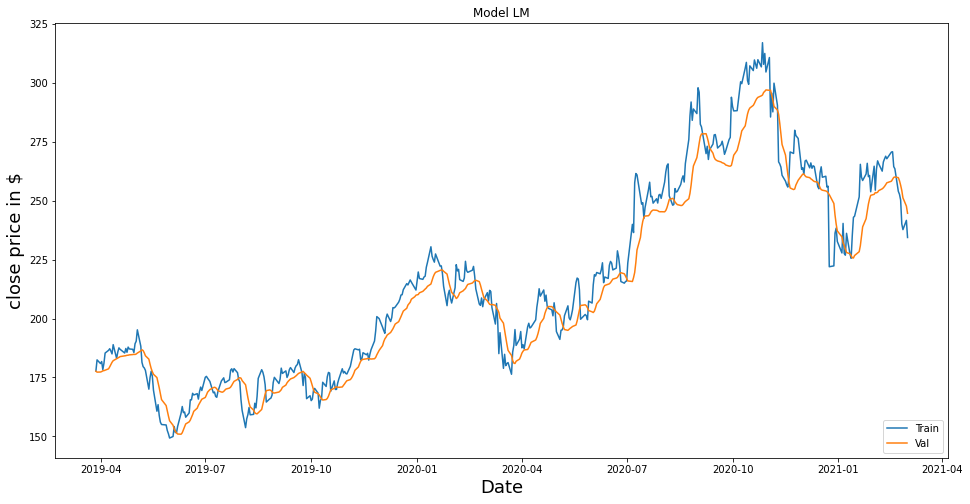

In [246]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Model LM")
plt.xlabel("Date", fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train','Val','predictions'], loc='lower right')
plt.show 

In [247]:
valid

,Close,predictions
Date,,
2019-03-28,177.729996,177.665009
2019-03-29,182.449997,177.241257
2019-04-01,180.889999,177.296921
2019-04-02,181.740005,177.477478
2019-04-03,178.320007,177.799637
...,...,...
2021-02-24,250.339996,256.621521
2021-02-25,240.179993,254.393509
2021-02-26,237.759995,251.263870


In [248]:
#Predict Next Day
real_data = [x_test[len(x_test) + 1 - prediction_days:len(x_test+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

# print(scaler.inverse_transform(real_data[-1]))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction:{prediction}")

Prediction:[[260.62146]]
